In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gp
import folium

In [42]:
df = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Predicted_Trips.csv')

In [43]:
len(df)

51328080

In [44]:
len(df)

51328080

In [45]:
df.head()

,Unnamed: 0,YEAR,MONTH,TOD,ORIGIN,DESTINATION,PRED_TRIPS,DISTANCE
0,0,2018,11,1,17031842400,17031842400,0.054527,0.0
1,1,2018,11,2,17031842400,17031842400,0.056030,0.0
2,2,2018,11,3,17031842400,17031842400,0.070483,0.0
3,3,2018,11,4,17031842400,17031842400,0.068086,0.0
4,4,2018,11,5,17031842400,17031842400,0.045321,0.0


In [46]:
df.head()

,Unnamed: 0,YEAR,MONTH,TOD,ORIGIN,DESTINATION,PRED_TRIPS,DISTANCE
0,0,2018,11,1,17031842400,17031842400,0.054527,0.0
1,1,2018,11,2,17031842400,17031842400,0.056030,0.0
2,2,2018,11,3,17031842400,17031842400,0.070483,0.0
3,3,2018,11,4,17031842400,17031842400,0.068086,0.0
4,4,2018,11,5,17031842400,17031842400,0.045321,0.0


In [47]:
df['DISTANCE'].mean()

8.416995024901455

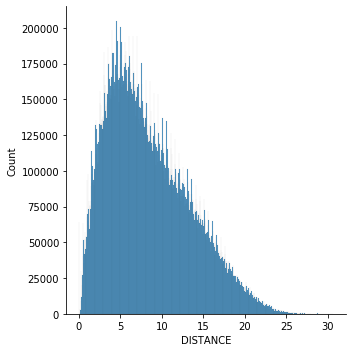

In [48]:
sns.displot(df['DISTANCE'])

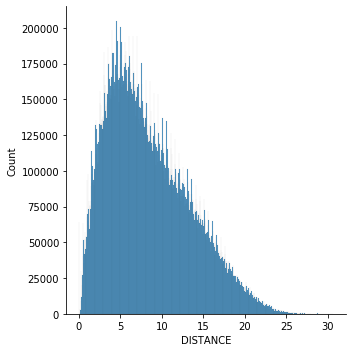

In [12]:
sns.displot(df['DISTANCE'])

In [12]:
obs = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Sample.csv')

In [13]:
obs_filtered = obs[obs['TRIP_LENGTH_MILES'] < 50]

In [14]:
obs_filtered['TRIP_LENGTH_MILES'].mean()

4.933584590208281

In [15]:
obs_filtered = obs_filtered.merge(dist, on = ['ORIGIN','DESTINATION'])

In [16]:
obs_filtered['DISTANCE'].mean()

2.9902527096171636

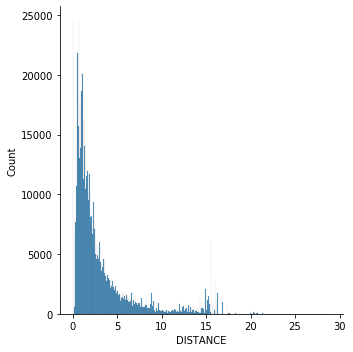

In [17]:
sns.displot(obs_filtered['DISTANCE'])

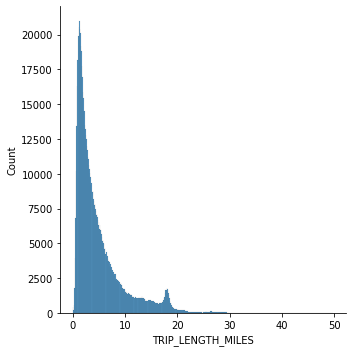

In [23]:
sns.displot(obs_filtered['TRIP_LENGTH_MILES'])

In [25]:
map_df = df[['DESTINATION','TOD','TRIPS']].groupby(by = ['DESTINATION','TOD'], as_index = False).sum()

In [29]:
tracts = gp.read_file('C:/Workspace/TNC-Demand-Model/Inputs/Census Shapefiles/Illinois/Chicago Tracts/geo_export_558aad9f-98d8-4dd5-a6b1-c1730155d596.shp')


In [32]:
tracts['DESTINATION'] = tracts.geoid10.astype(float)

In [42]:

# Add the color for the chloropleth:
m = folium.Map([41.8781, -87.6298], zoom_start=11)
m.choropleth(
 geo_data=tracts,
 name= 'Predicted Dropoffs',
 data=map_df,
 columns = ['DESTINATION', 'TRIPS'],
 key_on='feature.properties.geoid10',
 fill_color='BuGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 #bins = bins,
 legend_name= 'Total Predicted Dropoffs',
 highlight = True
)

#feature_group = folium.FeatureGroup(name='Census Tract Centroids', show = False)

#for tract2 in centroids.GEOID:
  #  row = centroids[centroids['GEOID'] == tract2]
 #   folium.CircleMarker([row['Y'], row['X']], popup = str(int(row['GEOID'].values[0])), radius = 1, fill = True, fill_color = 'grey', color = 'grey').add_to(feature_group)

#m.add_child(feature_group)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Destination Choice Model Visualizations/Predicted_Dropoffs_Map.html')


C:\Users\ramu225\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [57]:
obs['TOD'] = np.where(obs['TOD_1'] == 1,1,np.nan)
obs['TOD'] = np.where(obs['TOD_2'] == 1,2,obs['TOD'])
obs['TOD'] = np.where(obs['TOD_3'] == 1,3,obs['TOD'])
obs['TOD'] = np.where(obs['TOD_4'] == 1,4,obs['TOD'])
obs['TOD'] = np.where(obs['TOD_5'] == 1,5,obs['TOD'])

In [58]:
obs['TRIPS'] = 1

In [59]:
obs = obs[['DESTINATION','TOD','MONTH','YEAR','DOW','TRIPS']].groupby(by = ['DESTINATION','DOW','YEAR','MONTH','TOD'], as_index = False).sum()

In [60]:
obs = obs[['DESTINATION','TOD','MONTH','YEAR','TRIPS']].groupby(by = ['DESTINATION','YEAR','MONTH','TOD'], as_index = False).mean()

In [61]:
obs = obs[['DESTINATION','TOD','TRIPS']].groupby(by = ['DESTINATION','TOD'], as_index = False).sum()

In [62]:
obs.head()

,DESTINATION,TOD,TRIPS
0,1.703101e+10,1.0,53.150000
1,1.703101e+10,2.0,31.316667
2,1.703101e+10,3.0,60.300000
3,1.703101e+10,4.0,32.650000
4,1.703101e+10,5.0,44.166667


In [63]:
df2 = map_df.merge(obs, on = ['DESTINATION','TOD'],suffixes = ('_PRED','_OBS'))

In [64]:
df2.head()

,DESTINATION,TOD,TRIPS_PRED,TRIPS_OBS
0,17031010100,1,13.505764,53.150000
1,17031010100,2,11.476194,31.316667
2,17031010100,3,17.567262,60.300000
3,17031010100,4,13.523643,32.650000
4,17031010100,5,10.917930,44.166667


In [65]:
df2.TRIPS_OBS.sum()

189567.68333333335

In [66]:
df2.TRIPS_PRED.sum()

216625.24737017372

In [67]:
df2['DIFF'] = df2['TRIPS_PRED'] - df2['TRIPS_OBS']

In [68]:
df2['PDIFF'] = df2['DIFF']/df2['TRIPS_OBS']

In [69]:
df2['DIFF'].max()

11997.730461367904

In [70]:
df2['DIFF'].min()

-1093.1428726722909

In [71]:
df2['DIFF'].mean()

7.0389084383039435

In [79]:

# Add the color for the chloropleth:
m = folium.Map([41.8781, -87.6298], zoom_start=11)
m.choropleth(
 geo_data=tracts,
 name= 'Difference Dropoffs',
 data=df2,
 columns = ['DESTINATION', 'DIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = [-1000,-500,-100,100,500,1000,3000],
 legend_name= 'Difference of Predicted and Observed Dropoffs',
 highlight = True
)

#feature_group = folium.FeatureGroup(name='Census Tract Centroids', show = False)

#for tract2 in centroids.GEOID:
  #  row = centroids[centroids['GEOID'] == tract2]
 #   folium.CircleMarker([row['Y'], row['X']], popup = str(int(row['GEOID'].values[0])), radius = 1, fill = True, fill_color = 'grey', color = 'grey').add_to(feature_group)

#m.add_child(feature_group)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Destination Choice Model Visualizations/Accuracy_Difference_Map.html')


In [83]:

# Add the color for the chloropleth:
m = folium.Map([41.8781, -87.6298], zoom_start=11)
m.choropleth(
 geo_data=tracts,
 name= 'Percent Difference Dropoffs',
 data=df2,
 columns = ['DESTINATION', 'PDIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = [-1,0,1,5,18],
 legend_name= 'Percent Difference of Predicted and Observed Dropoffs',
 highlight = True
)

#feature_group = folium.FeatureGroup(name='Census Tract Centroids', show = False)

#for tract2 in centroids.GEOID:
  #  row = centroids[centroids['GEOID'] == tract2]
 #   folium.CircleMarker([row['Y'], row['X']], popup = str(int(row['GEOID'].values[0])), radius = 1, fill = True, fill_color = 'grey', color = 'grey').add_to(feature_group)

#m.add_child(feature_group)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Destination Choice Model Visualizations/Accuracy_Percent_Difference_Map.html')
